In [2]:
import tensorflow as tf

import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [17]:
PATH = './Images'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, '')

In [18]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [52]:
batch_size = 128
epochs = 64
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [53]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
  directory = train_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
val_data_gen = validation_image_generator.flow_from_directory(
  directory = validation_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
test_data_gen = test_image_generator.flow_from_directory(
  directory = test_dir,
  classes = ['test'],
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
  shuffle = False
)

Found 110 images belonging to 7 classes.
Found 110 images belonging to 7 classes.
Found 13 images belonging to 1 classes.


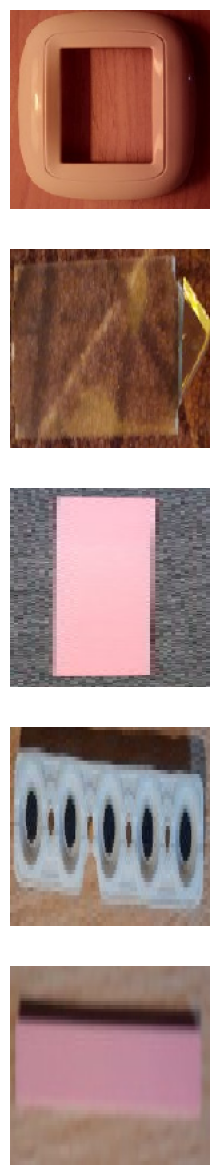

In [54]:
def plotImages(images_arr, probabilities = False, labels = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax, label in zip( images_arr, probabilities, axes, labels):
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{label} - {(probability*100)}")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Found 110 images belonging to 7 classes.


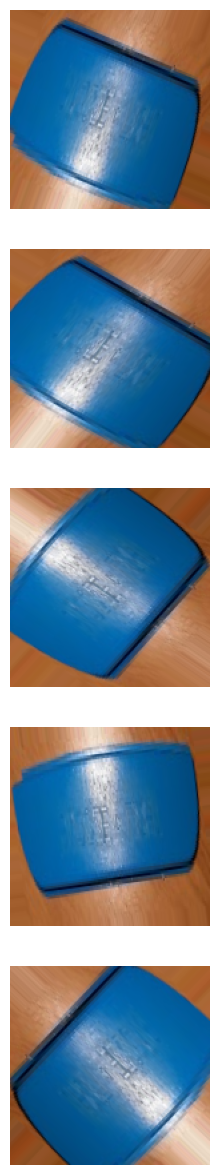

In [55]:
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = [0.9, 1.1],
    shear_range = 0.2
)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [56]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))
    

Found 110 images belonging to 7 classes.


In [57]:
"""
model = Sequential()
model.add(Conv2D(128, (6,6), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7))
"""
model = Sequential()
model.add(Conv2D(128, (6,6), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, input_dim=784))
model.add(Dense(64, input_dim=784))
model.add(Dense(7, activation='softmax'))

model.build(input_shape = [IMG_HEIGHT, IMG_WIDTH])
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 128)     13952     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 720000)            0         
                                                                 
 dense_12 (Dense)            (None, 128)               92160128  
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 7)                 455       
                                                     

In [58]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                    label_smoothing=0.0,
                                                    axis=-1),
    metrics = ['accuracy']
    )

In [59]:
history = model.fit(
    x = train_data_gen,
    epochs = epochs,
    batch_size = batch_size,
    steps_per_epoch = 1,
    validation_data = val_data_gen,
    validation_steps = 1
    )

Epoch 1/64
1/1 [==============================] - 4s 4s/step - loss: 2.0002 - accuracy: 0.1818 - val_loss: 266.7797 - val_accuracy: 0.1909
Epoch 2/64
1/1 [==============================] - 3s 3s/step - loss: 265.0575 - accuracy: 0.1909 - val_loss: 181.4346 - val_accuracy: 0.2273
Epoch 3/64
1/1 [==============================] - 3s 3s/step - loss: 178.0851 - accuracy: 0.2273 - val_loss: 59.3879 - val_accuracy: 0.3636
Epoch 4/64
1/1 [==============================] - 3s 3s/step - loss: 58.2899 - accuracy: 0.3545 - val_loss: 22.3608 - val_accuracy: 0.3545
Epoch 5/64
1/1 [==============================] - 3s 3s/step - loss: 21.4855 - accuracy: 0.3545 - val_loss: 11.5076 - val_accuracy: 0.2909
Epoch 6/64
1/1 [==============================] - 3s 3s/step - loss: 11.2458 - accuracy: 0.3000 - val_loss: 5.2974 - val_accuracy: 0.3364
Epoch 7/64
1/1 [==============================] - 3s 3s/step - loss: 5.0757 - accuracy: 0.3273 - val_loss: 3.0756 - val_accuracy: 0.3091
Epoch 8/64
1/1 [===========

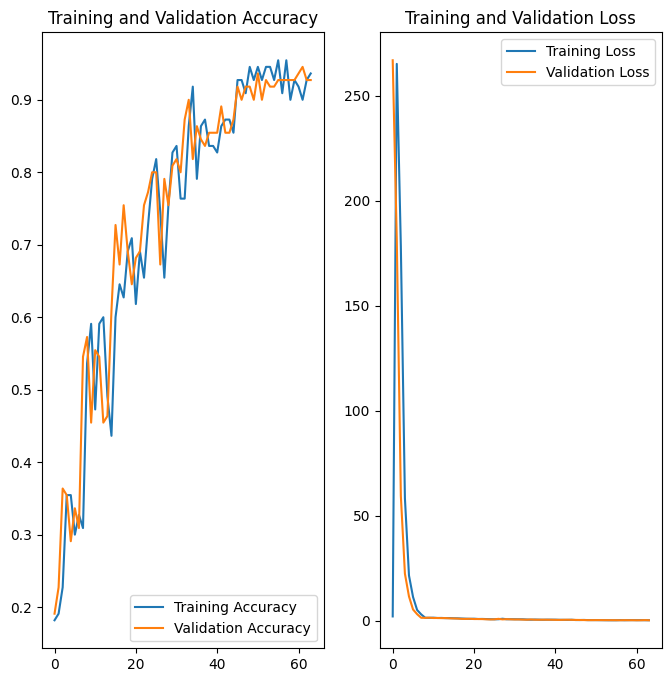

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [63]:
#save model

model.save('./saved_model/my_model')

INFO:tensorflow:Assets written to: ./saved_model/my_model\assets


INFO:tensorflow:Assets written to: ./saved_model/my_model\assets


1/1 [==============================] - 0s 169ms/step


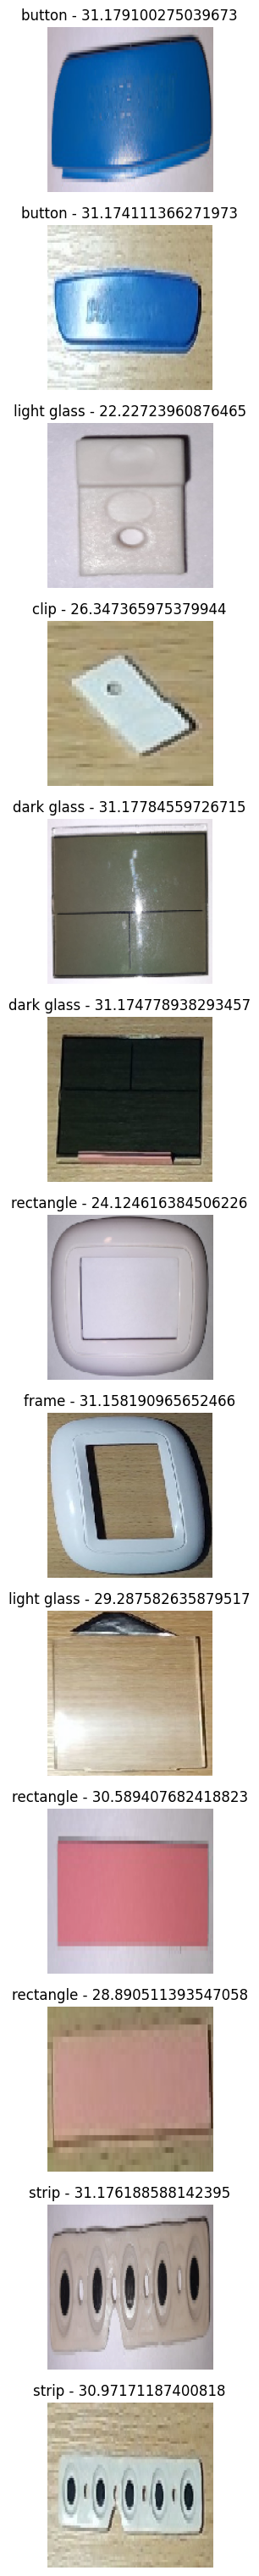

In [64]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data_gen)

test_images, _ = next(test_data_gen)


predictionPercent = []
predictionLabel = []
name = ["button", "clip", "dark glass", "frame", "light glass", "rectangle", "strip"]
for i in range(len(predictions)):
    value = 0
    category = 0
    for j in range(len(predictions[i])):
        if predictions[i][j] > value:
            value = predictions[i][j]
            category = j
    predictionPercent.append(value)
    predictionLabel.append(name[category])

plotImages(test_images, predictionPercent, predictionLabel)
